<a href="https://colab.research.google.com/github/kylama/musicrecognition/blob/main/MaSridharMusicCatogarizationGraphing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

pca = PCA(n_components = 1, random_state = 3)

# Import the k-Nearest Neighbors model from the sklearn library
from sklearn.neighbors import KNeighborsClassifier

# Import the train/test data split function from the sklearn library
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('songs_normalize.csv')

xDf = df[['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
yDf = df['genre']

display(xDf)
display(yDf)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.751,0.834,1,-5.444,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,0.434,0.897,0,-4.918,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,0.529,0.496,7,-9.007,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,0.551,0.913,0,-4.063,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,0.614,0.928,8,-4.806,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...
1995,0.842,0.734,1,-5.065,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,0.552,0.702,9,-5.707,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,0.847,0.678,9,-8.635,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,0.741,0.520,8,-7.513,0.0656,0.4500,0.000002,0.2220,0.347,102.998


,genre
0,pop
1,"rock, pop"
2,"pop, country"
3,"rock, metal"
4,pop
...,...
1995,pop
1996,pop
1997,"hip hop, country"
1998,pop


In [ ]:
# split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(xDf, yDf, test_size=0.2) # test on 20% of the data, so train on 80% of the data

In [ ]:
y_relationship = np.reshape(y_train, (len(y_train), ))
for i, value in enumerate(y_relationship):
  x = value.split(", ")
  value = x[0]
  y_relationship[i] = value
print(y_relationship[0:15])

['hip hop' 'hip hop' 'hip hop' 'rock' 'pop' 'pop' 'pop' 'hip hop' 'pop'
 'hip hop' 'pop' 'pop' 'hip hop' 'pop' 'hip hop']


In [ ]:
# specify model setup and train data
model = KNeighborsClassifier(n_neighbors = 10, weights = 'distance')
model.fit(X_train, y_train)
scaler = StandardScaler() # standardize the data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca.fit(X_train) # Fits the PCA model according to the data
X_reduced = pca.transform(X_train) # Transforms the 4D array to a 2D array and assigns to a new variable
print(X_reduced)

[[ -4.26716083]
 [  5.1500119 ]
 [-24.01858756]
 ...
 [ -6.97931368]
 [-36.83812766]
 [ 19.09300735]]


In [ ]:
# transforming genre data (y) into numerical data
for i, element in enumerate(y_relationship):
  if element == 'pop':
    y_relationship[i] = 1
  elif element == 'hip hop':
    y_relationship[i] = 2
  elif element == 'rock':
    y_relationship[i] = 3
  elif element == 'country':
    y_relationship[i] = 4
  elif element == 'metal':
    y_relationship[i] = 5
  elif element == 'R&B':
    y_relationship[i] = 6
  elif element == 'Dance/Electronics':
    y_relationship[i] = 7
  elif element == 'Folk/Acoustic':
    y_relationship[i] = 8
  elif element == 'latin':
    y_relationship[i] = 9
  elif element == 'blues':
    y_relationship[i] = 10
  else:
    y_relationship[i] = 0
print(y_relationship)
print(y_relationship.shape)

[2 2 2 ... 2 2 2]
(1600,)


1600
1600


<ipython-input-7-01756af157c5>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_reduced, y_relationship, c = 'red', cmap = 'viridis')


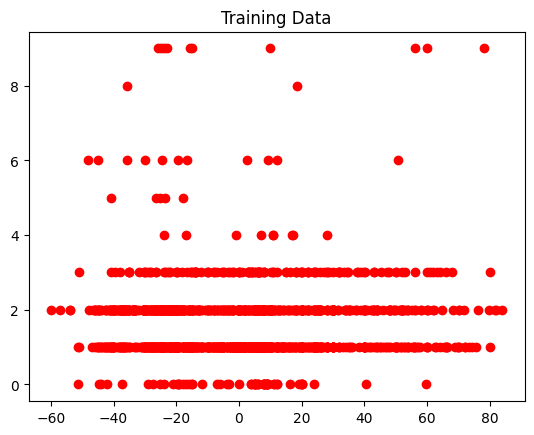

In [ ]:
# visualize training data
print(X_reduced.size)
print(y_relationship.size)

plt.scatter(X_reduced, y_relationship, c = 'red', cmap = 'viridis')
plt.title('Training Data')
plt.show()